In [1]:
import csv
import gensim.models.keyedvectors as kv

from sklearn import cluster
import numpy as np

import nltk
from nltk.corpus import stopwords
import bz2

import pandas as pd
import nltk
import os

import matplotlib.pyplot as plt
stop_words = set(stopwords.words('english')) 

In [2]:
rows=list()
# open Harvard Inquirer
with open('../lexicons/Harvard_Inquirer-inqtabs.txt', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for i,row in enumerate(reader):
        if i == 0:
            header = row
        else:
            rows.append(row)
            
inquirer = dict()

for c in header:
   
    # extract index from header
    idx = header.index(c)
   
    # extract words and drop to lowercase
    inquirer[c] = [w[0].lower() for w in rows if w[idx] != '']
   
    # remove alternate meanings and reduce duplicates
    inquirer[c] = list(set([w.split("#")[0] for w in inquirer[c]]))

In [3]:
genre_models=list()
input_data = ["../models/drama-17412.w2v.bz2",
             "../models/poetry-56817.w2v.bz2"]

for f in input_data:
    model_name = os.path.basename(f).split(".")[0]
    print("starting: {0}".format(model_name))
    model = kv.KeyedVectors.load_word2vec_format(bz2.open(f))
    genre_models.append([model_name,model])

starting: drama-17412
starting: poetry-56817


In [16]:
def make_plots(categories):

    for m in genre_models:
        # create dictionary of terms with category as value
        all_terms = dict()
        for c in inquirer.keys():
            for w in inquirer[c]:
                if w in m[1].vocab:
                    if c in categories:
                        all_terms[w] = c

        X=m[1][list(all_terms)]
        df=pd.DataFrame(X)
        df.shape

        #Computing the correlation matrix
        X_corr=df.corr()

        #Computing eigen values and eigen vectors
        values,vectors=np.linalg.eig(X_corr)

        #Sorting the eigen vectors coresponding to eigen values in descending order
        args = (-values).argsort()
        values = vectors[args]
        vectors = vectors[:, args]

        #Taking first 2 components which explain maximum variance for projecting
        new_vectors=vectors[:,:2]

        #Projecting it onto new dimesion with 2 axis
        neww_X=np.dot(X,new_vectors)

        plt.figure(figsize=(13,7))
        plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='lightskyblue')
        plt.xlabel("PC1",size=15)
        plt.ylabel("PC2",size=15)
        plt.title("Word Embedding Space "+m[0],size=20)
        vocab=list(all_terms)
        for i, word in enumerate(vocab):
          plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))


In [17]:
all_categories = list(inquirer)
selected_categories = ["Pleasur","Pain","Feel","Arousal", "Polit@", "Relig"]

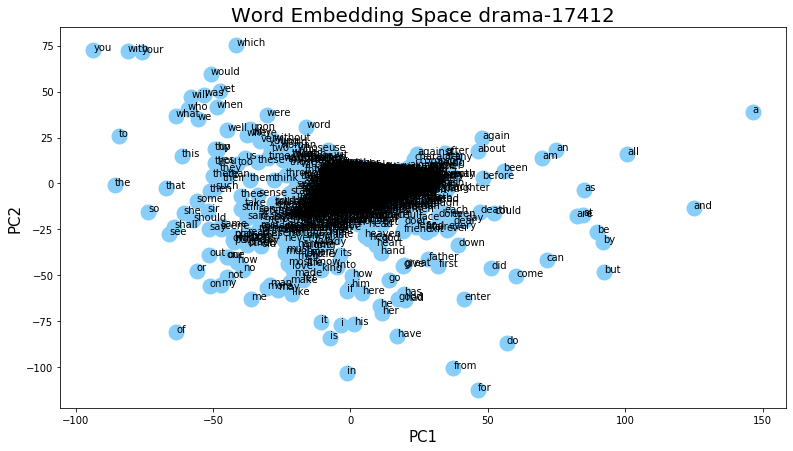

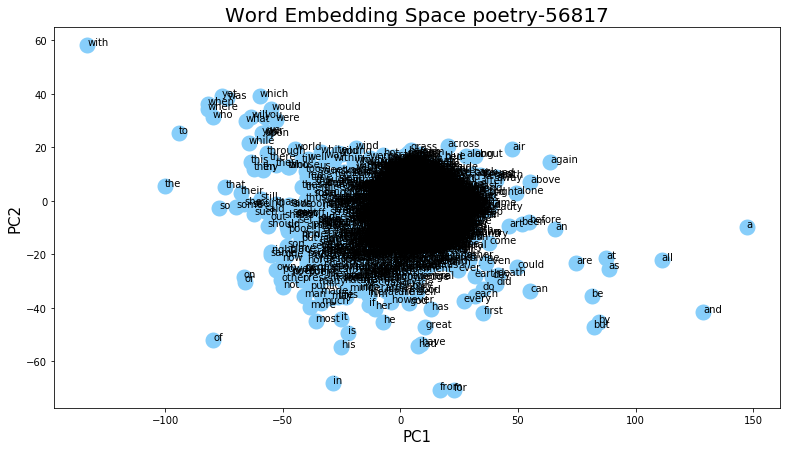

In [18]:
make_plots(all_categories)

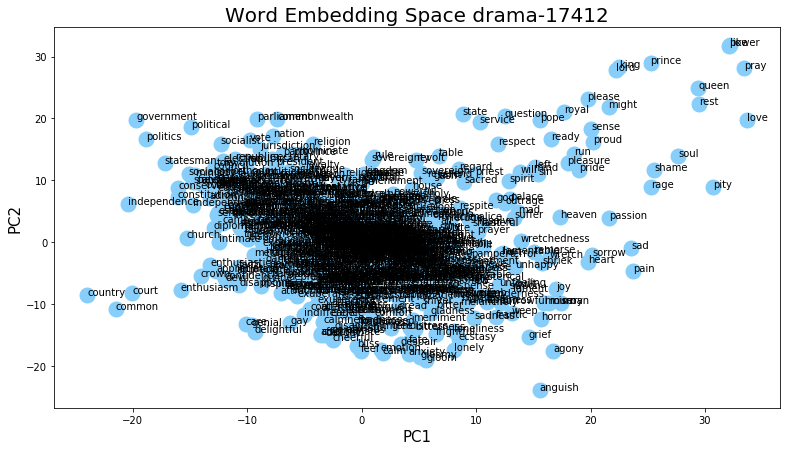

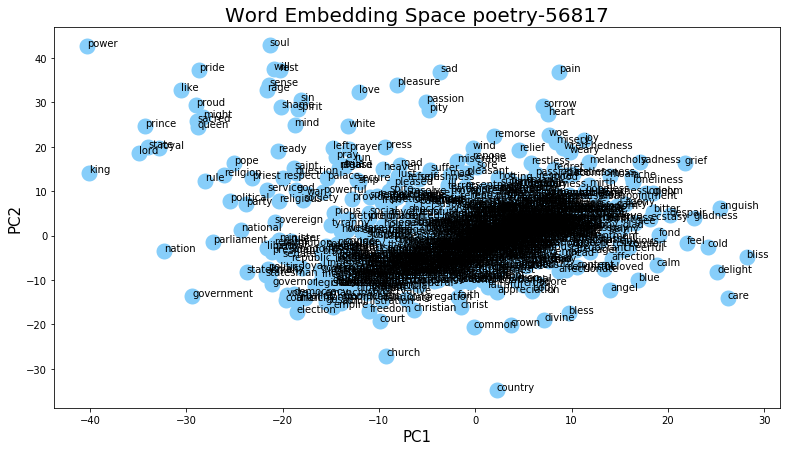

In [19]:
make_plots(selected_categories)

//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1759: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1761: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:813: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:675: ComplexWarning: C

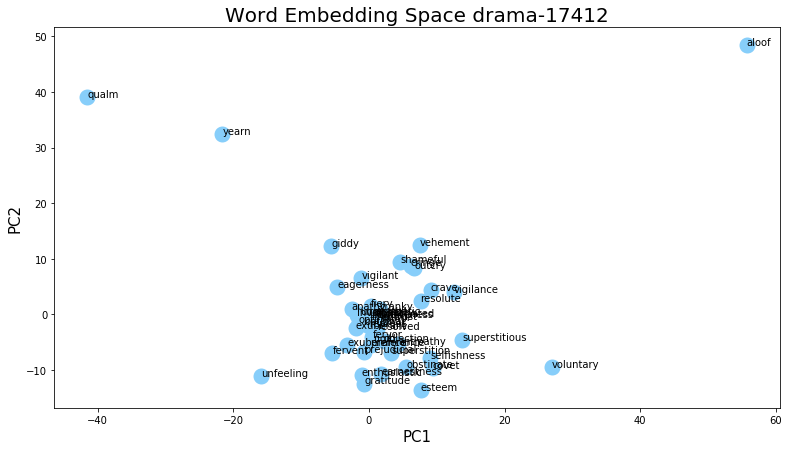

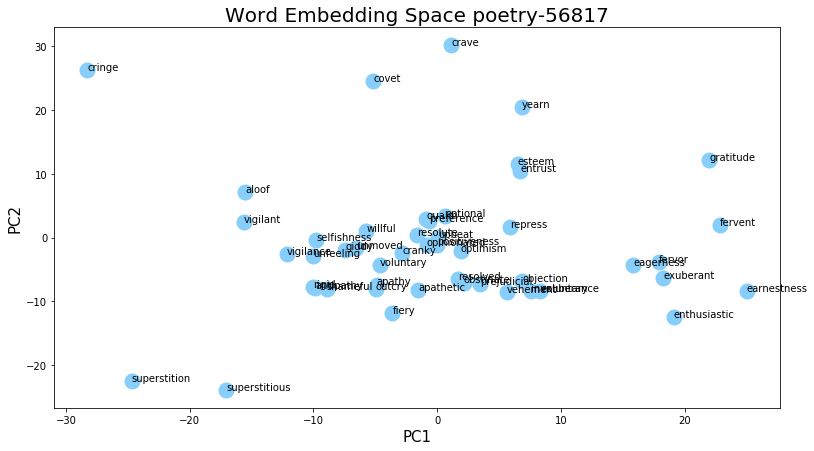

In [20]:
make_plots(["Feel"])

In [ ]:
# lay on top of one another and change colors